# Heart Failure Prediction using SVM and KNN

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [14]:
!pip install catboost

In [15]:
!pip install keras

In [17]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Preethi\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=6a85580172945bd3be0a39fc25a4befaf1139b252f49e98090a76fa0304dcd30
  Stored in directory: c:\users\preethi\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=db2e201eca46bb22a089a1090dc70e8aafc057ab3d3f5ff9ac92dbd3dc1b66b4
  Stored in directory: c:\users\preethi\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling nump

In [20]:
pip install --upgrade tensorflow 

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
Processing c:\users\preethi\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached protobuf-3.15.5-py2.py3-none-any.whl (173 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached google_auth_oauthlib-0.4.3-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-1.27.1-py2.py3-none-any.whl (136 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cac

In [22]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install missingno

In [25]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 


# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten,Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
import keras
import cv2
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix





# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


In [26]:
heart_pred=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [27]:
heart_pred.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [28]:
heart_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [29]:
heart_pred.shape

(299, 13)

In [30]:
# Checking missing values
display(heart_pred.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

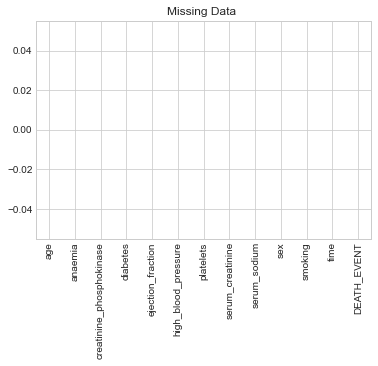

In [31]:
heart_pred.isnull().sum().plot(kind='bar',color = 'pink')
plt.title("Missing Data ")
plt.show()

In [34]:
# Visualisation
display(heart_pred.DEATH_EVENT.value_counts())

0    203
1     96
Name: DEATH_EVENT, dtype: int64

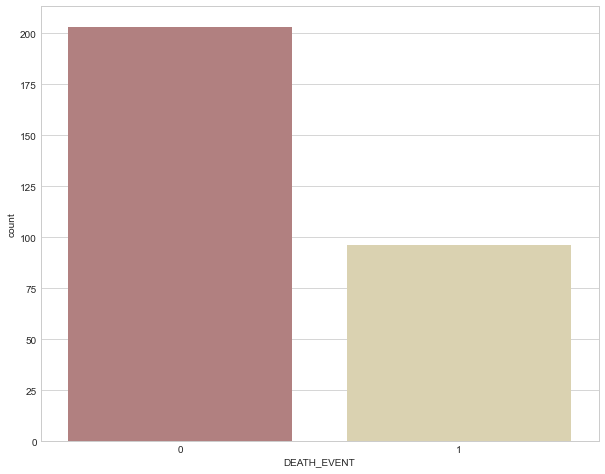

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='DEATH_EVENT', data=heart_pred , palette='pink');

Number of patients survived are 203 and not survived are 96 approximately.

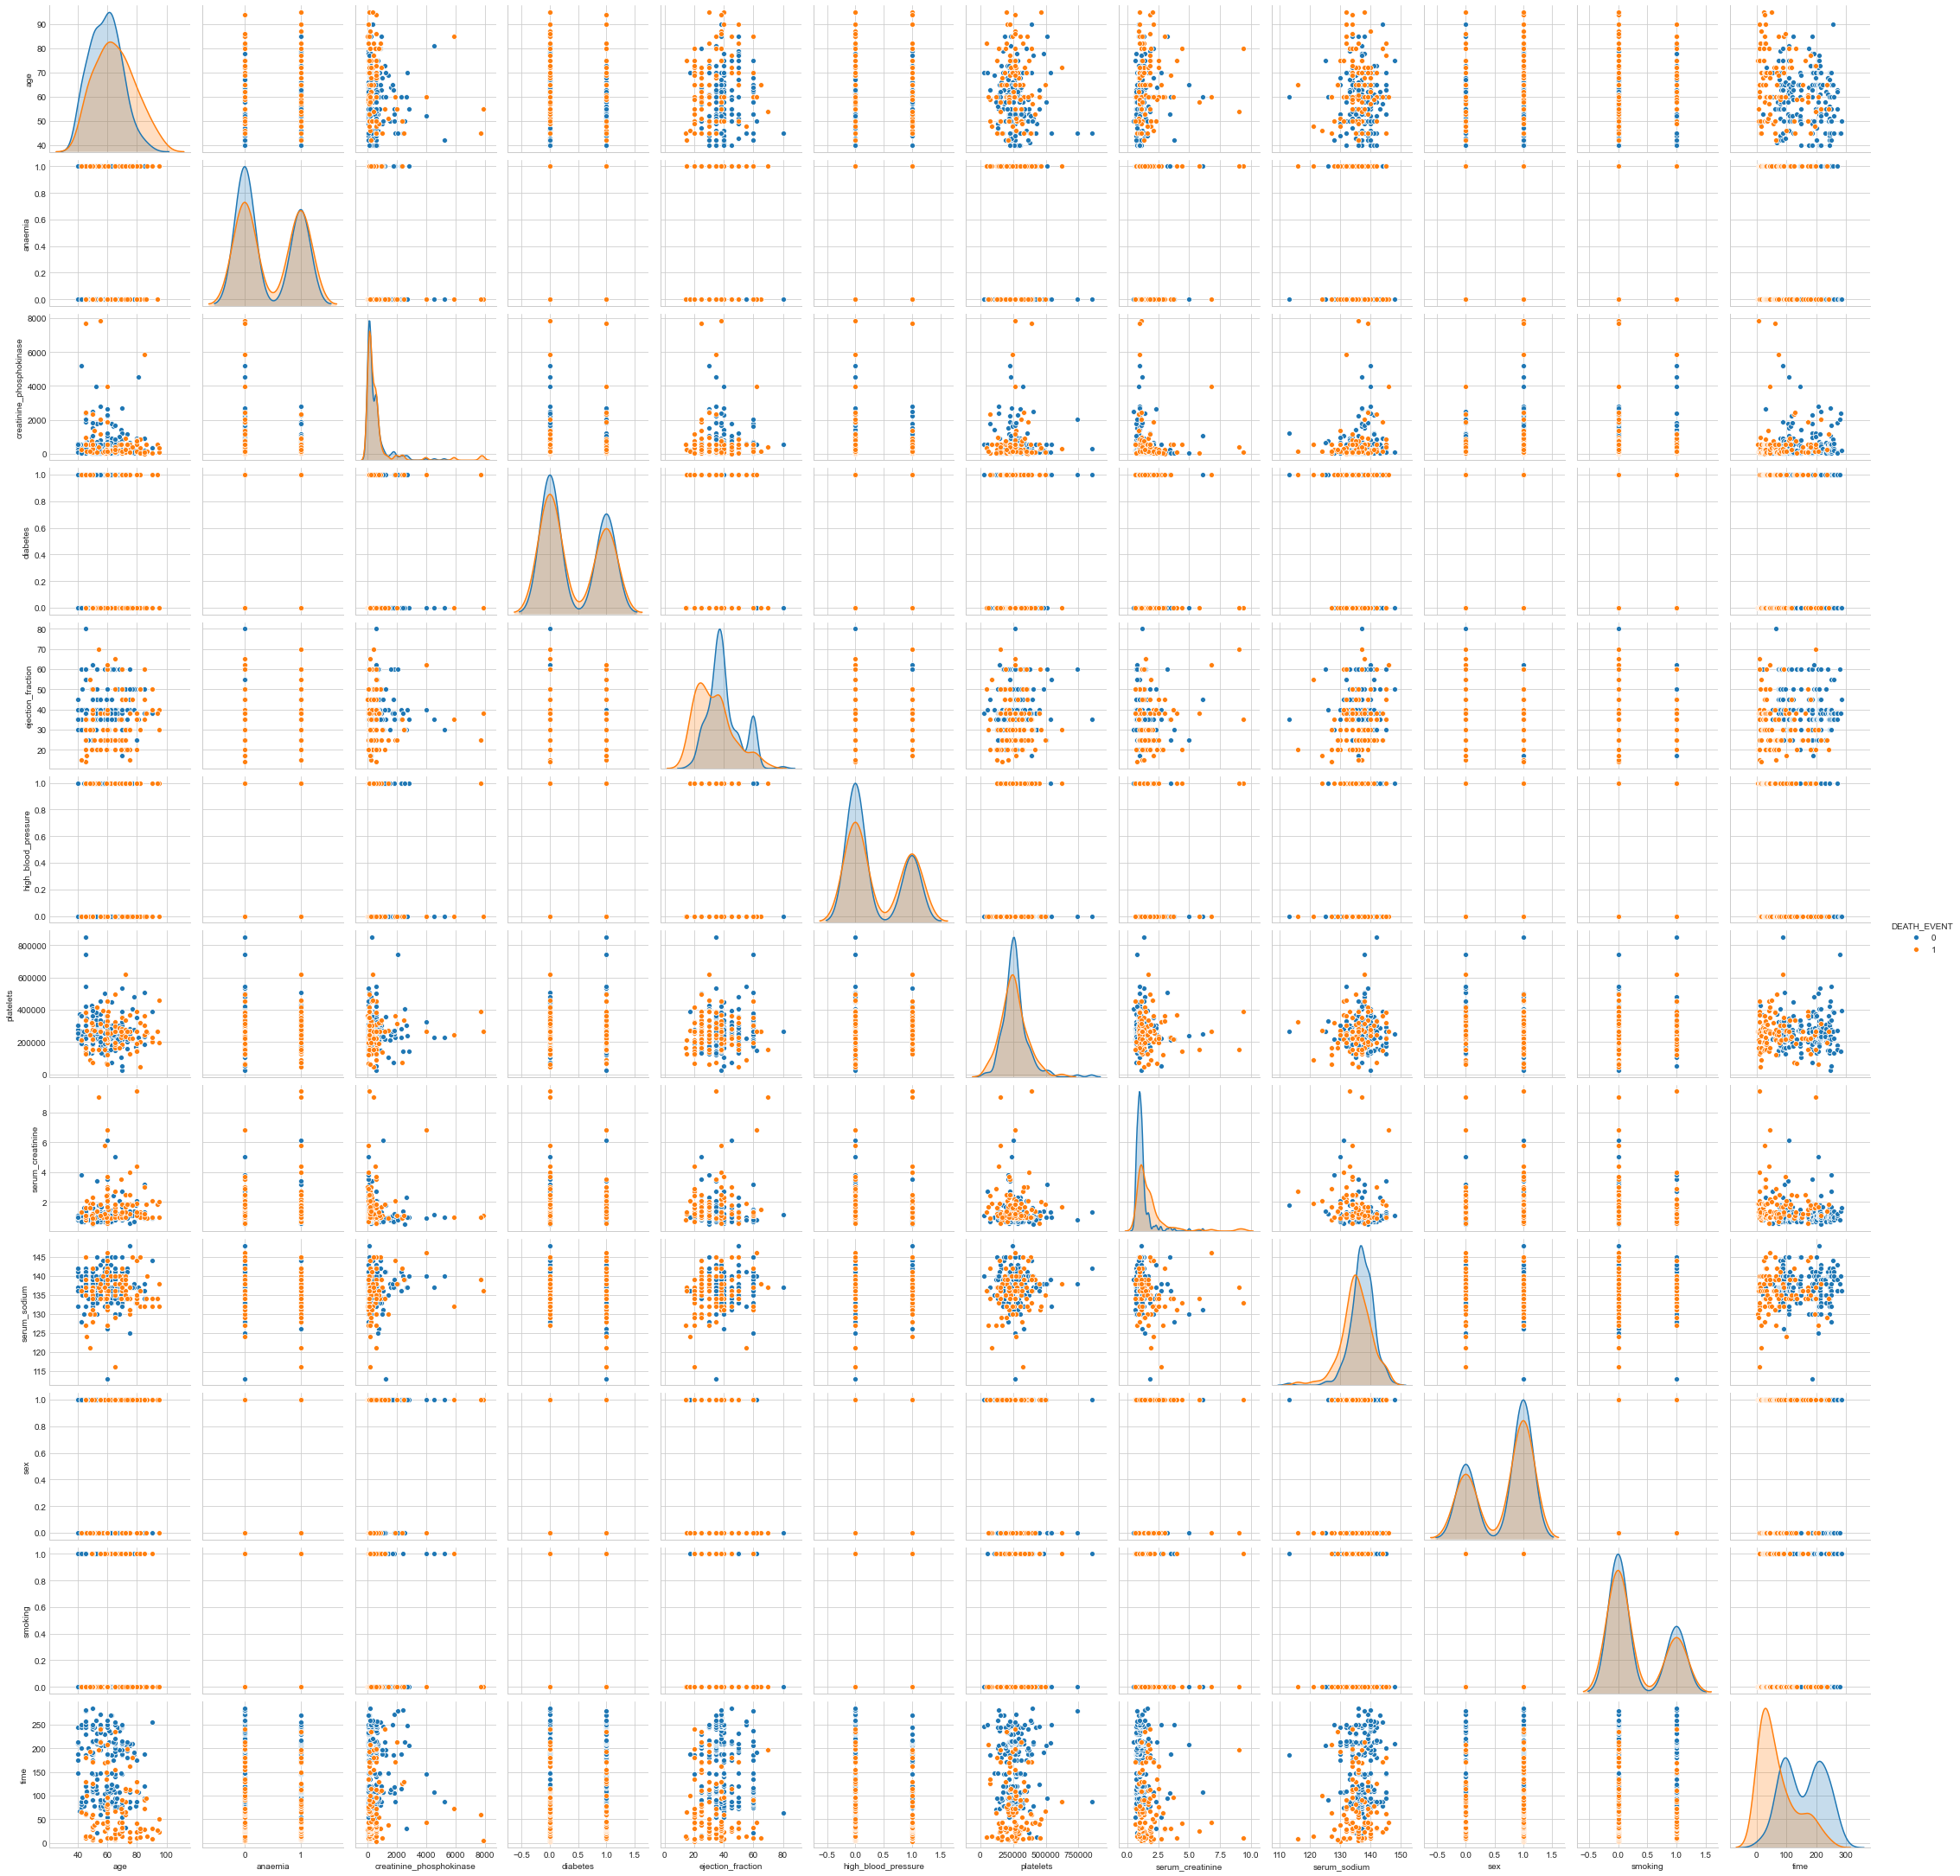

In [39]:
sns.pairplot(heart_pred, hue="DEATH_EVENT")

In [41]:
male_survived = heart_pred[heart_pred["sex"]==1]
female_survived = heart_pred[heart_pred["sex"]==0]
male_sur= male_survived[male_survived["DEATH_EVENT"]==0]
female_sur= female_survived[female_survived["DEATH_EVENT"]==0]

In [42]:
labels = ['Male_Survived','Male_Not Survived', "Female_Survived", "Female_Not Survived"]
values = [len(male_survived[heart_pred["DEATH_EVENT"]==0]),len(male_survived[heart_pred["DEATH_EVENT"]==1]),
         len(female_survived[heart_pred["DEATH_EVENT"]==0]),len(female_survived[heart_pred["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(
    title_text = "gender Case :"
)
fig.show()

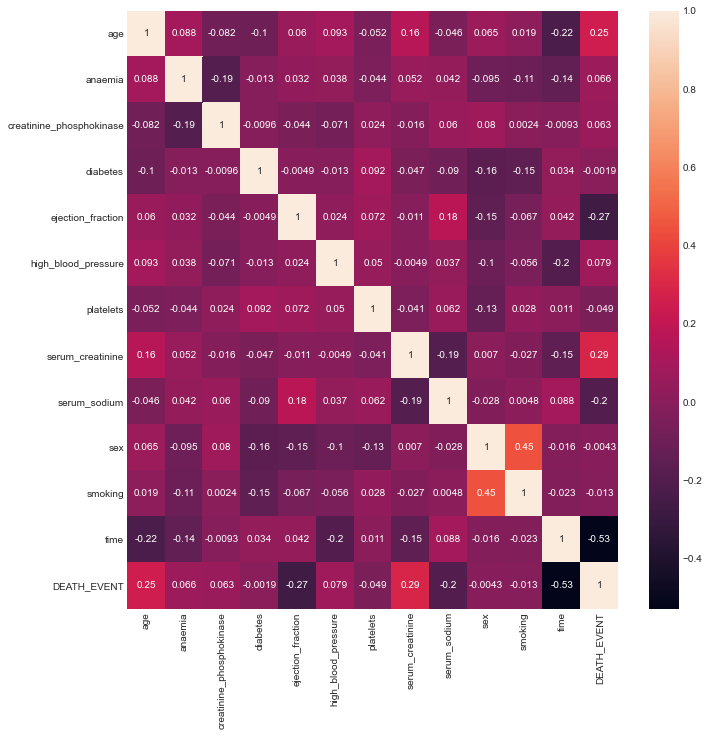

In [43]:
# Correlation
plt.subplots(figsize=(11, 11)) 
sns.heatmap(heart_pred.corr(),annot=True)

In [45]:
# Preprocessing of dataset
# Normalisation
minmax_scaler = MinMaxScaler()

heart_pred_normal = pd.DataFrame(minmax_scaler.fit_transform(heart_pred), columns = heart_pred.columns)

heart_pred_normal

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.071319       0.0           0.090909   
1    0.272727      0.0                  1.000000       0.0           0.363636   
2    0.454545      0.0                  0.015693       0.0           0.090909   
3    0.181818      1.0                  0.011227       0.0           0.090909   
4    0.454545      1.0                  0.017479       1.0           0.090909   
..        ...      ...                       ...       ...                ...   
294  0.400000      0.0                  0.004848       1.0           0.363636   
295  0.272727      0.0                  0.229268       0.0           0.363636   
296  0.090909      0.0                  0.259888       1.0           0.696970   
297  0.090909      0.0                  0.304925       0.0           0.363636   
298  0.181818      0.0                  0.022072       0.0           0.469697   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1.0   0.290823          0.157303      0.485714  1.0   
1                    0.0   0.288833          0.067416      0.657143  1.0   
2                    0.0   0.165960          0.089888      0.457143  1.0   
3                    0.0   0.224148          0.157303      0.685714  1.0   
4                    0.0   0.365984          0.247191      0.085714  0.0   
..                   ...        ...               ...           ...  ...   
294                  1.0   0.157474          0.067416      0.857143  1.0   
295                  0.0   0.296884          0.078652      0.742857  0.0   
296                  0.0   0.869075          0.033708      0.714286  0.0   
297                  0.0   0.139290          0.101124      0.771429  1.0   
298                  0.0   0.448418          0.123596      0.657143  1.0   

     smoking      time  DEATH_EVENT  
0        0.0  0.000000          1.0  
1        0.0  0.007117          1.0  
2        1.0  0.010676          1.0  
3        0.0  0.010676          1.0  
4        0.0  0.014235          1.0  
..       ...       ...          ...  
294      1.0  0.946619          0.0  
295      0.0  0.950178          0.0  
296      0.0  0.975089          0.0  
297      1.0  0.982206          0.0  
298      1.0  1.000000          0.0  

[299 rows x 13 columns]

In [46]:
X = heart_pred_normal.loc[:, heart_pred_normal.columns != 'DEATH_EVENT']
y =heart_pred_normal['DEATH_EVENT']

In [47]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
X_train.shape

(239, 12)

In [49]:
y_train.shape

(239,)

In [50]:
# Build Model
# SVM (Support_Vector_Machine)
model = SVC(kernel='rbf',random_state=1,C=1, gamma = 0.1)

In [51]:
# Fit Model
model.fit(X_train,y_train)

SVC(C=1, gamma=0.1, random_state=1)

In [52]:
# Predict Model
y_pred = model.predict(X_test)

In [53]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7666666666666667


In [54]:
Conv = confusion_matrix(y_test,y_pred)
Conv

array([[43,  0],
       [14,  3]], dtype=int64)

In [55]:
# KNN (K-Nearest_Neighbour)
classifier = KNeighborsClassifier(n_neighbors=5)

In [56]:
# Fit Model
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
# Predict Model
y_pred = classifier.predict(X_test)

In [58]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 70.0


KNN is the best model to predict the heart failure prediction since it has high accuracy.